In [138]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os 

# Vitualization
import seaborn as sns

# transformation
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold


# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# data prepossessing, PCA , kmean and Hierarchy dependencies
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, normalize


# gradient boost decision trees
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

In [139]:
# load dataset
Train_data = pd.read_csv("ML/application_train.csv")
Bureau_data = pd.read_csv("ML/bureau_balance.csv")
Test_data = pd.read_csv("ML/application_test.csv")
bureau = pd.read_csv("ML/bureau.csv")

"""creditcard_data = pd.read_csv("ML/credit_card_balance.csv")
POS_data = pd.read_csv("ML/POS_CASH_balance.csv")"""


'creditcard_data = pd.read_csv("ML/credit_card_balance.csv")\nPOS_data = pd.read_csv("ML/POS_CASH_balance.csv")'

In [140]:
# view application train dataset
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# view Bureau_data dataset
Bureau_data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [142]:
# explore the data column type distribution
Train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [143]:
Bureau_data.dtypes.value_counts()

int64     2
object    1
dtype: int64

In [144]:
Train_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<IPython.core.display.Javascript object>


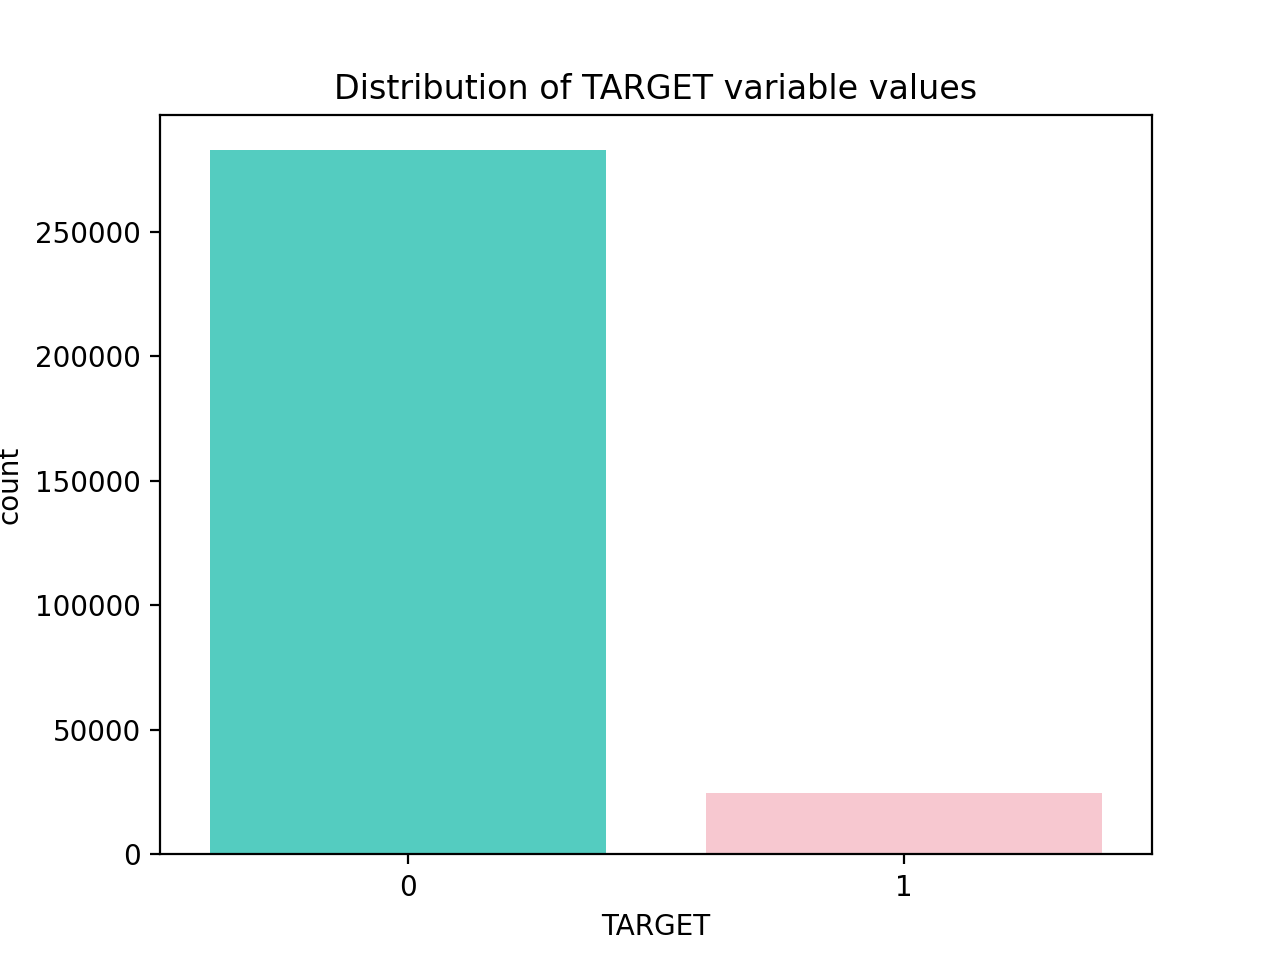

In [145]:
plt.title('Distribution of TARGET variable values')
sns.countplot(x=Train_data.TARGET, palette= ["#40E0D0", "pink"]);

In [146]:
# checking for missing values
count = Train_data.isnull().sum().sort_values(ascending=False)
percentage = ((Train_data.isnull().sum()/len(Train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


## Pre-proceesing of Data. 

In [147]:
# drop missing data
Train_data = Train_data.dropna()
Bureau_data = Bureau_data.dropna()
Test_data = Test_data.dropna()
bureau = bureau.dropna()

In [151]:
# checking if all missing values are gone
count = Train_data.isnull().sum().sort_values(ascending=False)
percentage = ((Train_data.isnull().sum()/len(Train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
SK_ID_CURR,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
WALLSMATERIAL_MODE,0,0.0
TOTALAREA_MODE,0,0.0
HOUSETYPE_MODE,0,0.0
FONDKAPREMONT_MODE,0,0.0
NONLIVINGAREA_MEDI,0,0.0
NONLIVINGAPARTMENTS_MEDI,0,0.0
LIVINGAREA_MEDI,0,0.0
LIVINGAPARTMENTS_MEDI,0,0.0


## Model Hidden Markov on the Bureau Data

In [158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

for i in Bureau_data.columns:
    label = LabelEncoder()
    Bureau_data[i]=label.fit_transform(Bureau_data[i])

for col in Bureau_data.columns:
    Bureau_data[[col]] = scaler.fit_transform(Bureau_data[[col]])

# Median imputation of missing values
# Replacing missing values with the median value in the column using the SimpleImputer class from sklearn.impute
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit the imputer to the Training data i.e. compute the chosen statistic (median) for each column in the dataset.
imputer.fit(Bureau_data)


print('Bureau data size: ', Bureau_data.shape)

Bureau data size:  (27299925, 3)


In [159]:
from hmmlearn.hmm import GaussianHMM, MultinomialHMM

HMM = GaussianHMM( covariance_type="full", n_iter = 10)

In [160]:

model = GaussianHMM( covariance_type="full", n_iter = 10)
model.fit(Bureau_data)

GaussianHMM(covariance_type='full')

In [161]:
prediction = model.predict(Bureau_data)

In [162]:
Bureau_data["Markov Model"] = prediction.tolist()

In [163]:
Bureau_data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,Markov Model
0,0.259116,1.000000,0.857143,0
1,0.259116,0.989583,0.857143,0
2,0.259116,0.979167,0.857143,0
3,0.259116,0.968750,0.857143,0
4,0.259116,0.958333,0.857143,0


## Building Gradient boosting random forest model without adding HMM to training data

In [165]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

for i in Train_data.columns:
    label = LabelEncoder()
    Train_data[i]=label.fit_transform(Train_data[i])

for col in Train_data.columns:
    Train_data[[col]] = scaler.fit_transform(Train_data[[col]])

# Median imputation of missing values
# Replacing missing values with the median value in the column using the SimpleImputer class from sklearn.impute
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit the imputer to the Training data i.e. compute the chosen statistic (median) for each column in the dataset.
imputer.fit(Train_data)


print('Training data size: ', Train_data.shape)

Training data size:  (8602, 122)


In [166]:
# target colunm
y = Train_data["TARGET"].to_frame() 
X = Train_data.drop(columns=['SK_ID_CURR', 'TARGET'])


# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

# Standarize data with StandarScaler
X_Train_scaled = MinMaxScaler().fit_transform(X_train)
X_Test_scaled = MinMaxScaler().fit_transform(X_test)


In [167]:
# evaluate training model
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_Train_scaled)
    test_pred = model_pipeline.predict(X_Test_scaled)
    
    train_pred_proba = model_pipeline.predict_proba(X_Train_scaled)
    test_pred_proba = model_pipeline.predict_proba(X_Test_scaled)
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_test, test_pred))

In [168]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=1, learning_rate=0.5, class_weight='balanced', num_leaves =42, random_state=22)

# train model
model = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.8459
Validation roc auc score= 0.7309

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[4232 1419]
 [  81  289]]
Validation confusion matrix:
 [[1817  608]
 [  67   89]]


## Re-Building Gradient boosting random forest model with HMM

In [169]:
ids = bureau[["SK_ID_CURR","SK_ID_BUREAU"]]

New_Burea_data = Bureau_data.merge(ids, on = ["SK_ID_BUREAU"], how="left")



In [170]:
train_new = Train_data.merge(New_Burea_data[["SK_ID_CURR","Markov Model"]], on = ['SK_ID_CURR'], how = 'left').drop_duplicates()


In [171]:
train_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Markov Model
0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.105660,0.406094,0.357161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.250000,NaN
1,0.000116,0.0,0.0,0.0,0.0,1.0,0.2,0.411321,0.127978,0.174825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.250000,NaN
2,0.000233,0.0,0.0,0.0,0.0,0.0,0.0,0.411321,0.477562,0.874126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.333333,NaN
3,0.000349,0.0,0.0,1.0,0.0,0.0,0.0,0.290566,0.130748,0.364672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.250000,NaN
4,0.000465,1.0,0.0,1.0,0.0,0.0,0.2,0.475472,0.702493,0.520073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3750,0.0,0.083333,NaN


In [173]:
# Building Gradient boosting random forest model with HMM
# target colunm
y = train_new["TARGET"].to_frame() 
X = train_new.drop(columns=['SK_ID_CURR', 'TARGET'])


# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

# Standarize data with StandarScaler
X_Train_scaled = MinMaxScaler().fit_transform(X_train)
X_Test_scaled = MinMaxScaler().fit_transform(X_test)



In [174]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=1, learning_rate=0.5, class_weight='balanced', num_leaves =42, random_state=22)

# train model
model2 = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model2)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.8459
Validation roc auc score= 0.7309

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[4232 1419]
 [  81  289]]
Validation confusion matrix:
 [[1817  608]
 [  67   89]]


SUMMARY
Bureau balance data has time series (MONTHS_BALANCE) as well as transition state ( STATUS), which make it perfect dataset to consider when doing probabilistic modelling. However, after the training and modelling Hidden Markov model does not improve or increase the accuracy.